<a href="https://colab.research.google.com/github/harita-gr/AI_ML_Practice/blob/main/ICT_AI_ML_LS_18_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [4]:
data.shape

(100, 6)

In [5]:
data['Species'].value_counts()

0    50
1    50
Name: Species, dtype: int64

It is a binary classification problem - 0 & 1

In [7]:
data = data.drop("Id", axis=1)

For training the Model, split the data

Note: This is a clean data. So skipping doing pre-processing.

In [8]:
x = data.drop('Species', axis=1)
y = data['Species']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from keras.models import Sequential #Seq model
from keras.layers import Dense #for creating hidden layers & other layers after input


Creating Model

In [11]:
model = Sequential() #contains input layers
#adding layers to model - 10 neurons
model.add(Dense(10,activation="relu"))
#output layer - 1 neuron, activation fn - sigmoid
model.add(Dense(1,activation="sigmoid"))

In [12]:
#since it is a binary classfication prob - use binary cross entropy as loss fn
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs = 100)
#epochs - no of times it will iterate (eg:if 80 data points, each will run 100 points)
#for larger data set, give epoch as a smaller number.

Epoch 1/100
3/3 [==============================] - 2s 8ms/step - loss: 1.4559 - accuracy: 0.5250
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 1.4154 - accuracy: 0.5250
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3733 - accuracy: 0.5250
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3374 - accuracy: 0.5250
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1.2982 - accuracy: 0.5250
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 1.2597 - accuracy: 0.5250
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 1.2261 - accuracy: 0.5250
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 1.1894 - accuracy: 0.5250
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 1.1543 - accuracy: 0.5250
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 1.1210 - accuracy: 0.5250
Epoch 11/100
3/3 [===========

In [14]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 160ms/step


In [15]:
y_pred # you get values from 0 to 1. since sigmoid is the activation fn.

array([[0.986849  ],
       [0.9391243 ],
       [0.9865861 ],
       [0.18995225],
       [0.30888262],
       [0.17349021],
       [0.19253422],
       [0.90197754],
       [0.1632698 ],
       [0.17295913],
       [0.15937647],
       [0.207743  ],
       [0.9604011 ],
       [0.16079855],
       [0.9616477 ],
       [0.17742364],
       [0.95304036],
       [0.9776247 ],
       [0.18153334],
       [0.16790254]], dtype=float32)

In [16]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [17]:
y_pred

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

Checking test data accuracy

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

Give an input sample and make prediction

In [24]:
model.predict([[6.6,2.9,1.3,0.2]]) #values for the 4 cols of data - SepalLengthCm...PetalWidthCm

1/1 [==============================] - 0s 134ms/step


array([[0.11860316]], dtype=float32)

Text(0, 0.5, 'Accuracy')

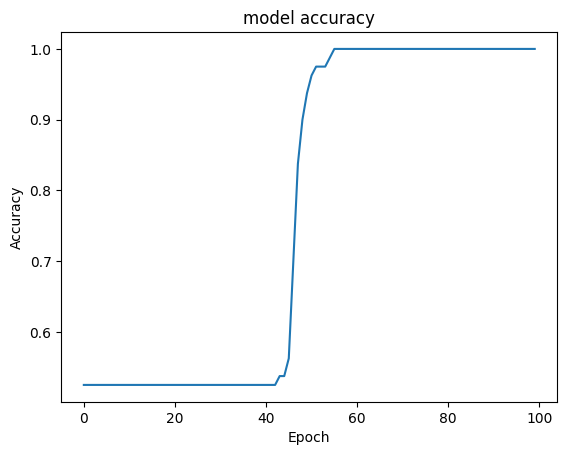

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title("model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

We recieved accuracy at 50th epoch approx.